# Ajustes não linear da dados experimentais de Arrhenius

In [54]:
# importando os pacotes do python
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Lendo o arquivo csv na pasta
dados = pd.read_csv('Arrhenius.csv') 

In [56]:
#transformando data frame em vetor
dados_np = dados.values

In [57]:
#impressão do vetor
dados_np

array([[3.13e+02, 4.30e-04],
       [3.19e+02, 1.03e-03],
       [3.23e+02, 1.80e-03],
       [3.28e+02, 3.55e-03],
       [3.33e+02, 7.17e-03]])

In [58]:
#vetor do eixo x
x = dados_np[:,0]
print(x)

[313. 319. 323. 328. 333.]


In [59]:
#vetor do eixo y
y = dados_np[:,1]
print(y)

[0.00043 0.00103 0.0018  0.00355 0.00717]


In [60]:
# Definição do modelo
def Arr(x, A, E):
  R = 8.314 # constante dos gases em Joule/ (mol * K)
  return A * np.exp(-(E/(R*x))) 

In [61]:
# Chamada de curve_fit
popt, pcov = curve_fit(Arr, x, y, p0=(10000,10), maxfev=2000)  
p1, p2 = popt

In [62]:
# Impressão dos parâmetros ótimos
print("Os parâmetros ajustados são p1=%g, p2=%g" % (p1, p2))

Os parâmetros ajustados são p1=2.27066e+17, p2=124321


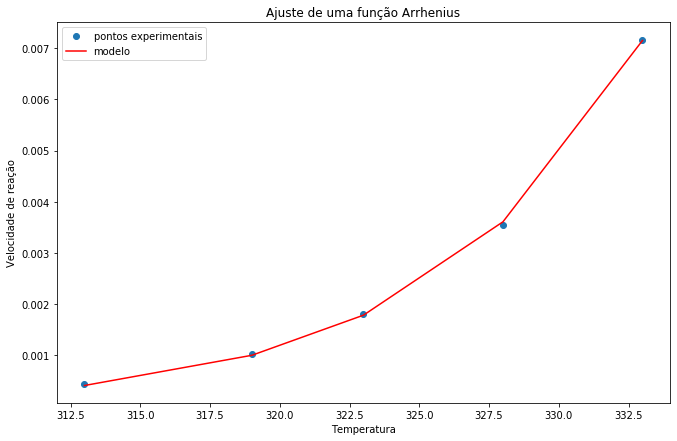

In [63]:
y_ajustado = Arr(x, p1, p2) 
#impressão dos dados experimentais e do modelo 
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, y_ajustado, "-r", label = "modelo")
plt.xlabel("Temperatura")
plt.ylabel("Velocidade de reação")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma função Arrhenius")
plt.legend()
plt.show()

In [64]:
r2 = 1. - sum((func(x, p1, p2) - y) ** 2) / sum((y - np.mean(y)) ** 2)

In [65]:
#dados do modelo ajustado
dados_df = pd.DataFrame({"Temperatura":x, "velocidade_mod":y_ajustado, "velocidade_exp":y})
print(dados_df)

Temperatura  velocidade_mod  velocidade_exp
0        313.0        0.000406         0.00043
1        319.0        0.000997         0.00103
2        323.0        0.001781         0.00180
3        328.0        0.003607         0.00355
4        333.0        0.007152         0.00717


In [66]:
print(f'A energia de ativação é: {p2:9.7} Joules/mol')
print(f'O fator de frequencia é: {p1:9.5} 1/s')
print(f'O Coeficiente de ajuste é: {r2:5.4}')


A energia de ativação é:  124320.6 Joules/mol
O fator de frequencia é: 2.2707e+17 1/s
O Coeficiente de ajuste é: 0.9998
